In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-12-20 07:05:08--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   155MB/s    in 0.9s    

2022-12-20 07:05:09 (155 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2022-12-20 07:05:09--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [3]:
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [4]:
import os

train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse40-9.png', 'horse14-8.png', 'horse12-0.png', 'horse45-4.png', 'horse11-6.png', 'horse29-0.png', 'horse06-9.png', 'horse37-8.png', 'horse28-8.png', 'horse28-0.png']
TRAIN SET HUMANS: ['human11-17.png', 'human09-06.png', 'human17-08.png', 'human01-20.png', 'human06-28.png', 'human05-21.png', 'human13-06.png', 'human11-16.png', 'human11-18.png', 'human02-14.png']
VAL SET HORSES: ['horse5-164.png', 'horse5-303.png', 'horse2-368.png', 'horse4-302.png', 'horse5-032.png', 'horse4-468.png', 'horse4-599.png', 'horse5-519.png', 'horse3-584.png', 'horse1-436.png']
VAL SET HUMANS: ['valhuman01-02.png', 'valhuman03-01.png', 'valhuman05-16.png', 'valhuman01-07.png', 'valhuman02-02.png', 'valhuman03-23.png', 'valhuman04-18.png', 'valhuman03-22.png', 'valhuman05-03.png', 'valhuman03-16.png']


In [6]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

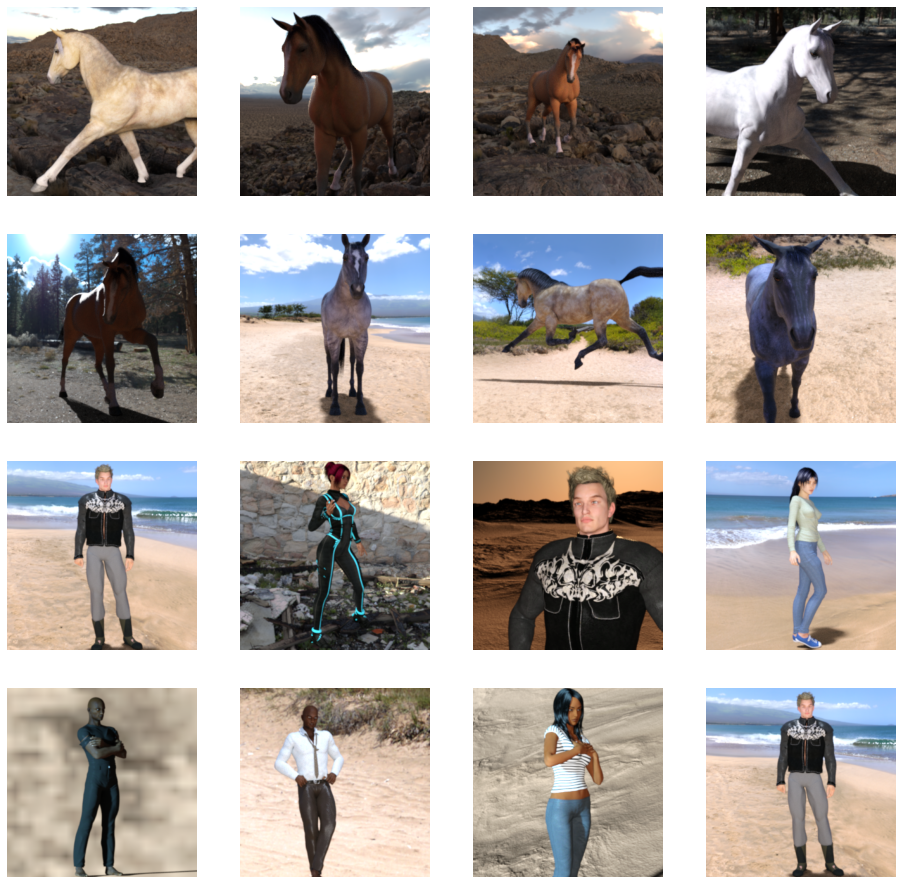

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',
        target_size=(300, 300),  
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  
        target_size=(300, 300), 
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 19s 955ms/step - loss: 0.9266 - accuracy: 0.5106 - val_loss: 0.5178 - val_accuracy: 0.7031
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.6992 - accuracy: 0.6263 - val_loss: 0.4982 - val_accuracy: 0.8281
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.6758 - accuracy: 0.7675 - val_loss: 1.8564 - val_accuracy: 0.7695
Epoch 4/15
8/8 [==============================] - 13s 2s/step - loss: 1.8802 - accuracy: 0.7887 - val_loss: 1.5693 - val_accuracy: 0.7461
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.4573 - accuracy: 0.8409 - val_loss: 7.6231 - val_accuracy: 0.5234
Epoch 6/15
8/8 [==============================] - 7s 900ms/step - loss: 0.3757 - accuracy: 0.8732 - val_loss: 1.1560 - val_accuracy: 0.8281
Epoch 7/15
8/8 [==============================] - 8s 952ms/step - loss: 0.1438 - accuracy: 0.9414 - val_loss: 1.5230 - val_accuracy: 0.8047
Epoch 8/15
8/8 [==============

In [14]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving KakaoTalk_20221216_140626295.jpg to KakaoTalk_20221216_140626295.jpg
1/1 [==============================] - 0s 270ms/step
[0.9999964]
KakaoTalk_20221216_140626295.jpg is a human


1/1 [==============================] - 0s 86ms/step


<ipython-input-15-3ba30d0f4703>:33: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


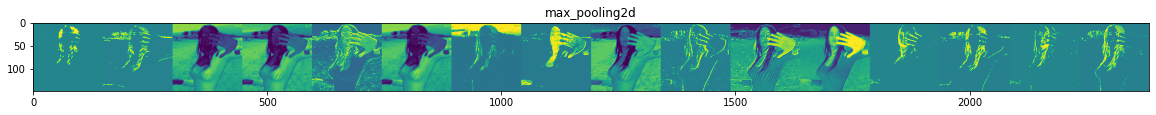

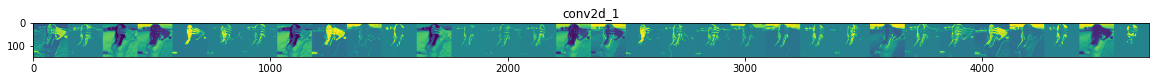

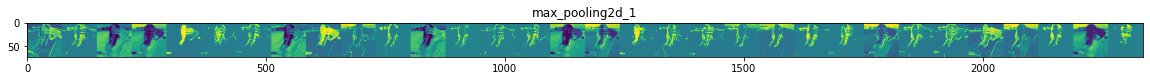

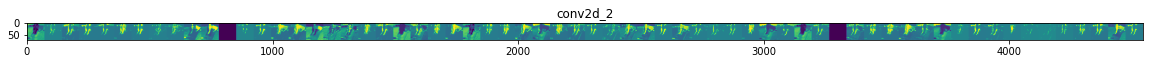

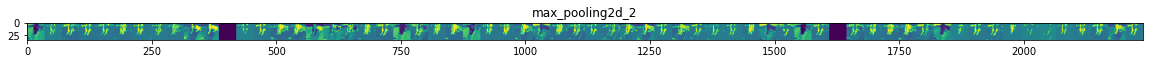

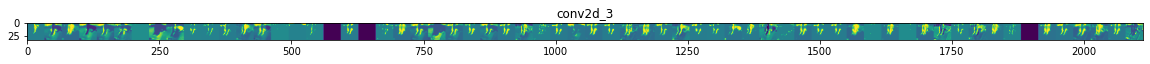

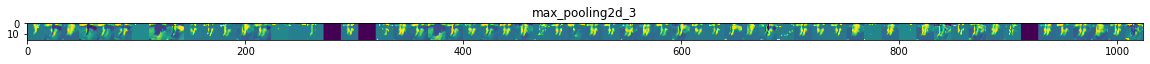

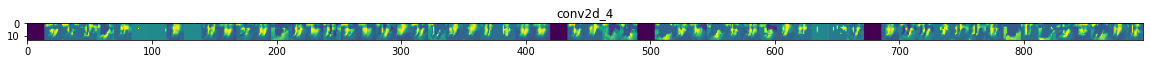

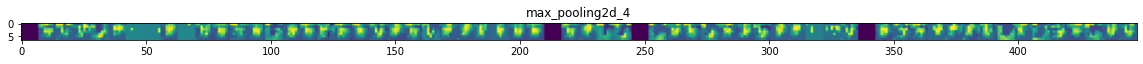

In [15]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300)) 
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    n_features = feature_map.shape[-1]  

    size = feature_map.shape[1]

    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')